In [1]:
source('../../function.r')

In [2]:
library(parallel)

In [3]:
load('variables_fromPreprocessing_unstimulated.image')

In [4]:
load('images/CROP-seq_calculation_0330_n3.image')

## plots PC selection

In [5]:
data.df <- Z_pca_results$x[,select.pcs]%>%as.data.frame

In [6]:
data.df <- data.df%>%mutate(label=as.character(z.labels))

In [7]:
psize(2,2)

In [8]:
plot.pc <- (ggplot(data.df,aes(x=PC1,y=PC17,color=label))+
    geom_point(size = 0.2)+
     scale_color_manual(values = color_)+
    theme_classic())%>%scatter_style()

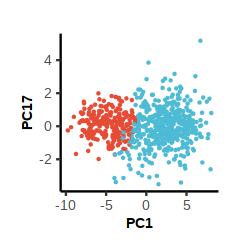

In [9]:
plot.pc

In [10]:
psize(6,6)

In [141]:
select.sgRNA <- c(1,3,5,6,18,25,26)

In [142]:
names.sgRNA <- colnames(X_design.stimulated)

In [143]:
psize(2,2)
plot.pc.y.list <- c()
for(i in select.sgRNA ){
    if(length(Y_PCs_EM_sep_results_all.stimulated[[i]])){
        y.labels <- Y_PCs_EM_sep_results_all.stimulated[[i]]%>%.$ey%>%apply(1,which.max)

        data.df <- Y_sgRNA_cellbypc.stimulated[[i]]%>%.[,select.pcs]%>%as.data.frame%>%
                    mutate(label=as.character(Y_PCs_EM_sep_results_all.stimulated[[i]]%>%.$ey%>%apply(1,which.max)))

        plot.pc.y.list[[i]] <- (ggplot(data.df,aes(x=PC1,y=PC17,color=label))+
            geom_point(size = 0.2)+
            #xlim(-17,5)+
             scale_color_manual(values = color_)+
            theme_classic())%>%scatter_style(
            title = paste(names.sgRNA[i], Y_PCs_EM_sep_results_all.stimulated[[i]]%>%.$el%>%.[1]%>%round(2))
            )
    }

}

In [144]:
psize(2,2)

In [146]:
pdf('results/pc_n3/pc_scatter_y.pdf',width = 2,height = 2)
plot.pc.y.list
dev.off()

[[1]]

[[2]]
NULL

[[3]]

[[4]]
NULL

[[5]]

[[6]]

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]

[[26]]


png 
  2

In [15]:
pc.th = 40

In [16]:
a=Z_pca_results$sdev[1:pc.th]/sum(Z_pca_results$sdev)
b=(Z_pca_results$x)[,1:pc.th]%>%apply(2,function(x){x%>%dip.test%>%.[['statistic']]})

data.df <- cbind(a,b,0)%>%as.data.frame%>%rename_with(~c('Var','Dip','Label'))

data.df[select.pcs,'Label'] <- 1

In [17]:
data.df <- data.df%>%rownames_to_column('id')%>%pivot_longer(cols = Var:Dip)%>%mutate(id=gsub('PC','',id))

In [18]:
data.df$id <- factor(data.df$id, levels=c(1:pc.th))

In [19]:
data.df$value <- data.df$value * 100

In [20]:
psize(4,4)

In [21]:
plot.percentage <- (ggplot(data.df,aes(x=id,y=value,group=name,color=name))+geom_point(size=0.5)+
        geom_line() +
        scale_color_manual(values = colors_[c(8,4)])+
        geom_abline(slope = 0,intercept = 0.0122*100,color=colors_[8],linetype=3)+
        geom_vline(xintercept = 20,color=colors_[4],linetype=3)+
        scale_y_continuous(
            "Explained Variance (%)", 
            sec.axis = sec_axis(~ . , name = "Modality Score (*0.01)")
          )+
        theme_classic()+
        xlab('PCs'))%>%scatter_style()+
        theme(axis.text.x=element_blank(),
              #axis.line.y.right = element_line(color =  colors_[8]),
              axis.ticks.y.right = element_line(color =  colors_[8]),
            axis.text.y.right = element_text(color =  colors_[8]), 
            axis.title.y.right = element_text(color =  colors_[8]),
              
            # axis.line.y.left = element_line(color = colors_[4]),
              axis.ticks.y.left = element_line(color = colors_[4]),
            axis.text.y.left = element_text(color = colors_[4]), 
            axis.title.y.left = element_text(color =colors_[4])
        )

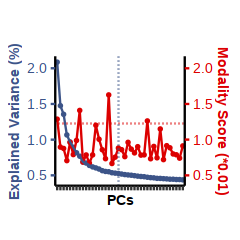

In [147]:
plot.percentage

## get matrix heatmap

In [23]:
Z.unstimulated <- apply(Z.unstimulated, c(1,2), as.numeric)

Z.unstimulated <- (Z.unstimulated/rowSums(Z.unstimulated)*10000)

In [24]:
Z_log.unsti <- log(Z.unstimulated+1)
colnames(Z_log.unsti) <- gsub("_","-", colnames(Z_log.unsti))
Z_log_sub.unsti <- Z_log.unsti[,CROP_variable_genes]

In [321]:
psize(6,6)

In [326]:
sites <- which(X_design.stimulated%>%colSums>50)%>%names

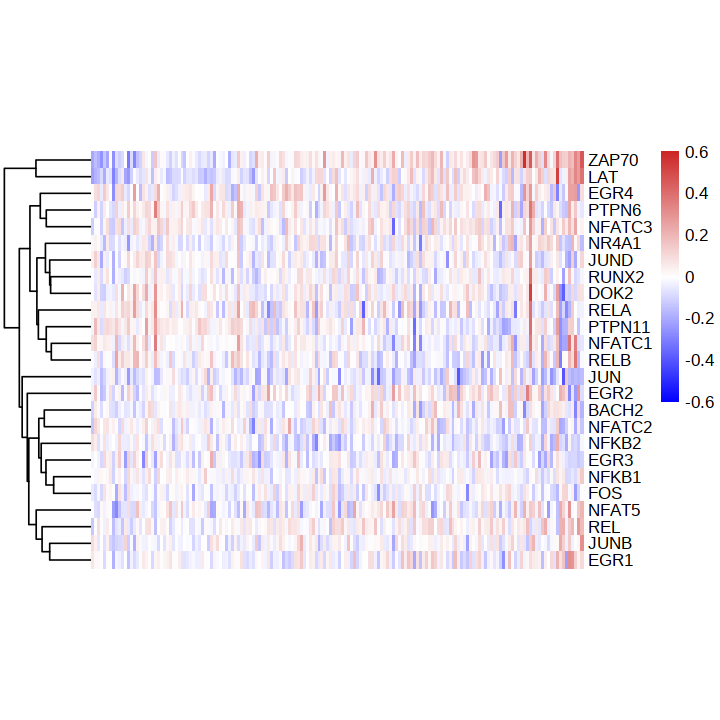

In [339]:
max =0.6# max(abs(beta_EM_matrix_all.stimulated))
len = length(seq(-max,max,0.001))
temp_heatmap <- pheatmap(-(beta_EM_matrix_all.stimulated[sites[2:length(sites)],intersect(paper_mentioned_gene_names, 
                                                                     rownames(bb_all.stimulated))]),
                         cluster_cols=F,cluster_rows = T,breaks = seq(-max,max,0.001),cellheight=10,
                         #filename="coef_sparse_paper_Tm.pdf",
                         show_colnames = F,show_rownames=T,width=50,fontsize_row=10, fontsize_col=10,angle_col=90,
                         color = colorRampPalette(c("blue", "white", "firebrick3"))(len))

In [345]:
plot.heatmap <- temp_heatmap

In [27]:
mat.tmp <- -(beta_EM_matrix_all.stimulated[,intersect(paper_mentioned_gene_names, 
                                                                     rownames(bb_all.stimulated))])

In [28]:
diff.sti <- Z_log%>%colMeans - Z_log.unsti%>%colMeans

In [29]:
mat.vs.unsti <- mat.tmp + diff.sti[paper_mentioned_gene_names]

In [30]:
psize(10,10)

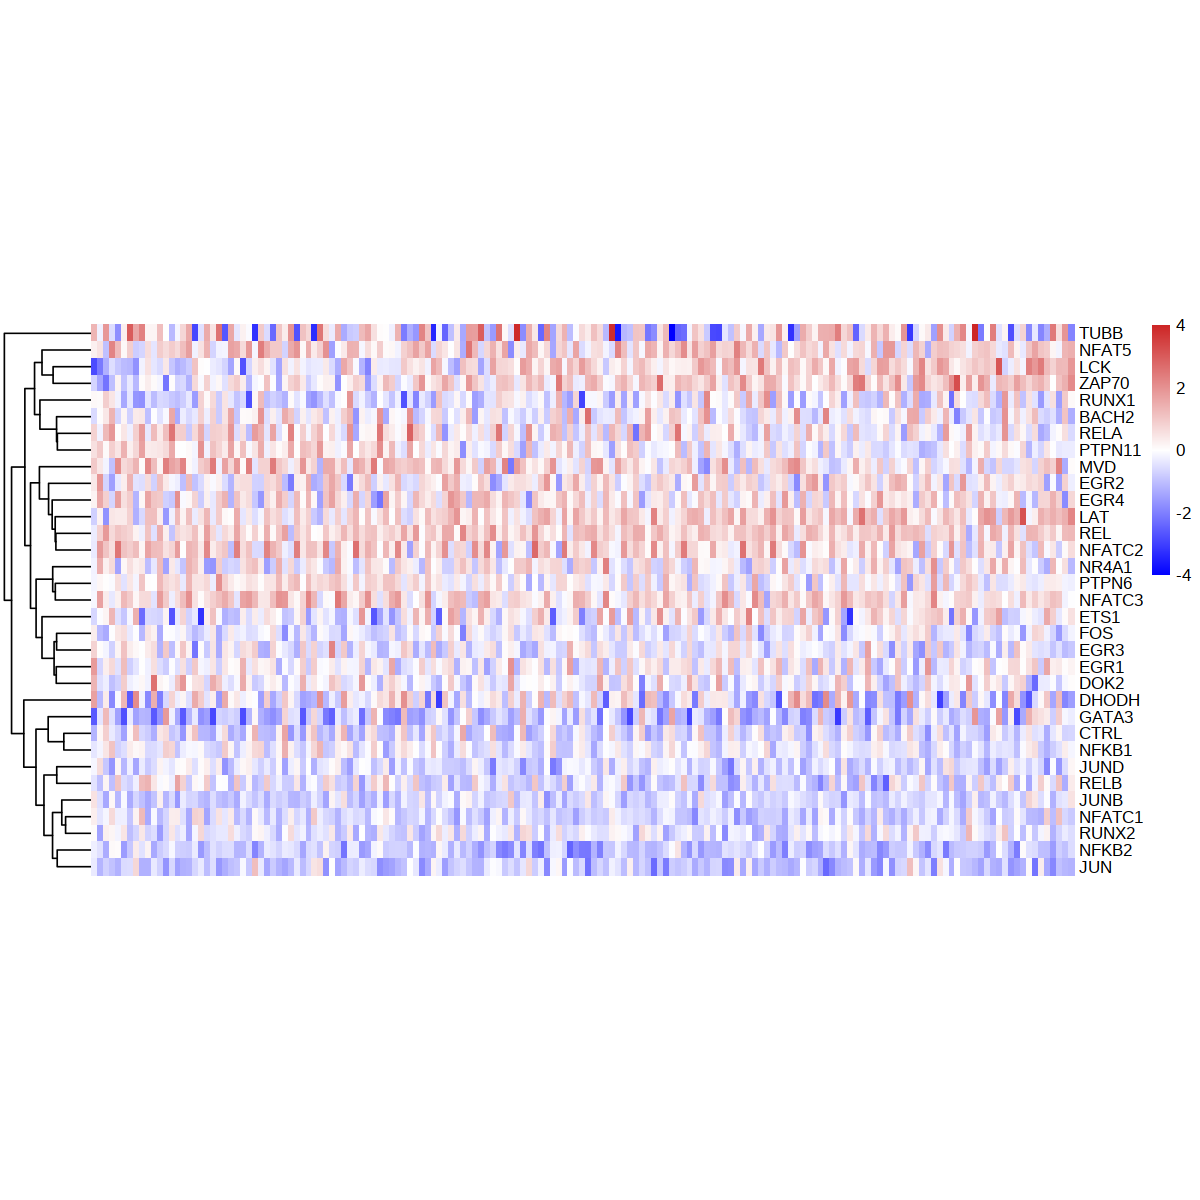

In [31]:
max = 4#max(abs(scale(mat.vs.unsti)))
len = length(seq(-max,max,0.001))
temp_heatmap <- pheatmap(scale((mat.vs.unsti)),
                         cluster_cols=F,cluster_rows = T,breaks = seq(-max,max,0.001),cellheight=10,
                         #filename="coef_sparse_paper_Tm.pdf",
                         show_colnames = F,show_rownames=T,width=50,fontsize_row=10, fontsize_col=10,angle_col=90,
                         color = colorRampPalette(c("blue", "white", "firebrick3"))(len))

## plot ratios

In [240]:
ratios <- Y_PCs_EM_sep_results_all.stimulated%>%lapply(function(x){x$el[1]})

In [241]:
data.df=ratios %>%unlist%>%cbind(which(colSums(X_design.stimulated)>50)%>%names)%>%
as.data.frame%>%rename_with(~c('value','site'))

In [242]:
data.df$value=as.numeric(data.df$value)

In [243]:
data.df$site = factor(data.df$site,levels=which(colSums(X_design.stimulated)>50)%>%names)

In [244]:
sort(X_design.stimulated%>%colSums,decreasing = TRUE)%>%names

[1] "CTRL"   "NFKB1"  "NFATC1" "EGR1"   "FOS"    "BACH2"  "JUND"   "JUNB"  
 [9] "RUNX2"  "DOK2"   "REL"    "RELB"   "NR4A1"  "JUN"    "PTPN6"  "NFATC3"
[17] "ZAP70"  "PTPN11" "EGR2"   "NFKB2"  "LAT"    "NFATC2" "RELA"   "EGR4"  
[25] "EGR3"   "NFAT5"  "LCK"    "GATA3"  "RUNX1"  "ETS1"   "MVD"    "DHODH" 
[33] "TUBB"

In [249]:
sort(X_design.stimulated%>%colSums,decreasing = TRUE)

CTRL  NFKB1 NFATC1   EGR1    FOS  BACH2   JUND   JUNB  RUNX2   DOK2    REL 
   705    156    146    134    131    118    110    107    105    105    100 
  RELB  NR4A1    JUN  PTPN6 NFATC3  ZAP70 PTPN11   EGR2  NFKB2    LAT NFATC2 
    97     90     87     87     85     83     82     77     75     74     71 
  RELA   EGR4   EGR3  NFAT5    LCK  GATA3  RUNX1   ETS1    MVD  DHODH   TUBB 
    62     60     55     52     49     44     29     28     28     20      7

In [254]:
data.df%>%arrange(abs(value-0.333))%>%pull(site)

[1] CTRL   NFAT5  NFATC3 REL    JUN    EGR2   JUNB   NFATC2 EGR1   NFKB2 
[11] EGR3   FOS    NFKB1  BACH2  LAT    PTPN11 RUNX2  RELA   JUND   PTPN6 
[21] RELB   EGR4   ZAP70  DOK2   NR4A1  NFATC1
26 Levels: CTRL NFKB1 NFATC1 EGR1 FOS BACH2 JUND JUNB RUNX2 DOK2 REL ... NFAT5

In [259]:
# data.df$site <- data.df$site%>%
#             factor(levels=intersect(sort(X_design.stimulated%>%colSums,decreasing = TRUE)%>%names,
#                                    data.df$site))
data.df$site <- data.df$site%>%
            factor(levels=data.df%>%arrange(abs(value))%>%pull(site))

In [260]:
plot.ratio <- (ggplot(data.df,aes(x=site,y=value))+geom_col(width = 0.8, fill=colors_[10])+theme_classic()+
    theme(axis.text.x = element_text(angle = 70, vjust = 1, hjust=1))+
     geom_hline(yintercept = data.df[1,1],color='black',,linetype=3)+
     xlab('')+ylab('Cluster1\'s Ratio'))%>%scatter_style(ratio=0.2,x.angle=70)+
    theme(axis.text.x = element_text(angle = 70, vjust = 1, hjust=1))

In [261]:
psize(5,5)

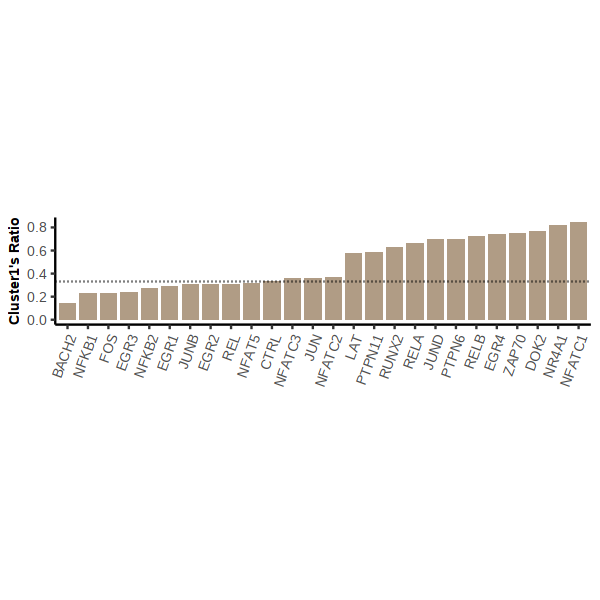

In [262]:
plot.ratio 

## plot Correlation

In [263]:
library(ggrepel)

# get matrix of all genes

In [239]:
beta_EM_matrix_all.stimulated <- cbind(beta_EM_matrix.stimulated, 
                                       t(bb_all.stimulated[setdiff(rownames(bb_all.stimulated),gsub('-gene','_gene',CROP_variable_genes)),]) )

beta_mean_matrix_all.stimulated <- cbind(beta_mean_matrix.stimulated, 
                                         t(bb_all.stimulated[setdiff(rownames(bb_all.stimulated),gsub('-gene','_gene',CROP_variable_genes)),]))


diff <- beta_EM_matrix_all.stimulated - beta_mean_matrix_all.stimulated

In [196]:
em.results <- beta_EM_matrix_all.stimulated[,intersect(paper_mentioned_gene_names,rownames(bb_all.stimulated))]

mean.results <- beta_mean_matrix_all.stimulated[,intersect(paper_mentioned_gene_names,rownames(bb_all.stimulated))]

In [466]:
# a <- (mean.results[,1:55]%>%rowMeans - (mean.results[,56:ncol(mean.results)]%>%rowMeans))
# b <- (em.results[,1:55]%>%rowMeans - (em.results[,56:ncol(mean.results)]%>%rowMeans))
a <- (mean.results[,1:55]%>%rowSums - (mean.results[,56:ncol(mean.results)]%>%rowSums))
b <- (em.results[,1:55]%>%rowSums - (em.results[,56:ncol(mean.results)]%>%rowSums))
re.sc <- cbind(a,b)

a = tmp[intersect(paper_mentioned_gene_names[1:55],rownames(tmp)),]%>%colMeans
b = tmp[intersect(paper_mentioned_gene_names[55:length(paper_mentioned_gene_names)],rownames(tmp)),]%>%colMeans
bulk=a-b

re <- re.sc%>%as.data.frame%>%rename_with(~c('mean','em'))%>%rownames_to_column('gene')%>%
left_join(as.data.frame(a-b)%>%rownames_to_column('gene'))%>%rename('bulk'='a - b')

Joining, by = "gene"



In [467]:
score.sti <- diff.sti[mean.results%>%colnames%>%.[1:55]]%>%sum - 
diff.sti[mean.results%>%colnames%>%.[56:ncol(mean.results)]]%>%sum

In [468]:
re <- re %>% mutate_each(~-(.+score.sti),mean:em)%>%mutate(label=ifelse(em>mean,gene,''))

In [469]:
re <- re%>%mutate(label.known = ifelse(label%in%c('JUN','RELA','RELB','ZAP70','PTPN11','PTPN6','LAT','EGR4','DOK2'),label,''))

In [470]:
psize(2,2)

In [473]:
plot.cor <- (ggplot(re,aes(x=(mean),y=em))+geom_point(size=0.5)+
        geom_abline(slope = 1,intercept = 0)+
#       geom_smooth(method=lm, se=TRUE, linetype="dashed",
#                  color="darkred")+
     geom_abline(slope = 0,intercept = 0,color='red')+
    geom_text_repel(aes(label = label.known), size = 2,segment.size=0.2,max.overlaps = 100)+
    #scale_x_continuous(breaks = c(-0.1,0,0.1))+
    xlab('Raw Activation Score')+ylab('Deconvoluted Activation Score')+
    theme_classic())%>%scatter_style() 
#     ggtitle(paste0('Pearson Correlation=',
#                    cor(re$em,-re$bulk,use = 'complete.obs')%>%round(2)))

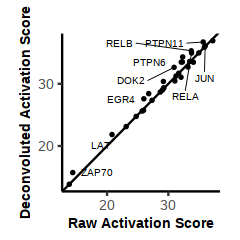

In [474]:
plot.cor

## CD69

In [404]:
rank.abs.em <- beta_EM_matrix_all.stimulated%>%abs%>%desc%>%apply(1,rank)%>%.['CD69',]/ncol(beta_EM_matrix_all.stimulated)*100

rank.abs.mean <- beta_mean_matrix_all.stimulated%>%abs%>%desc%>%apply(1,rank)%>%.['CD69',]/ncol(beta_EM_matrix_all.stimulated)*100

In [405]:
data.df <- cbind(rank.abs.em,rank.abs.mean)%>%as.data.frame%>%
            rownames_to_column('gene')%>%mutate(em.symbol=beta_EM_matrix_all.stimulated[,'CD69']>0,
                                               mean.symbol=beta_mean_matrix_all.stimulated[,'CD69']>0)

In [406]:
plot.rank <- (data.df%>%ggplot(aes(x=rank.abs.em, y=rank.abs.mean,label=gene))+
        geom_point(size=.5)+theme_classic()+
        geom_text_repel(max.overlaps = 20,size=2)+
        geom_abline(slope = 1,intercept = 0)+
        ylim(0,100)+
        xlim(0,100)+
        xlab('Deconvoluted Response(%)')+
        ylab('Observed Response(%)'))%>%scatter_style(title = 'CD69')

In [407]:
psize(4,2)

Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


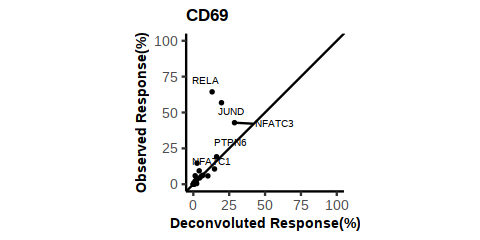

In [408]:
plot.rank

## enrichR

In [58]:
library('enrichR')

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!



In [59]:
colnames(beta_EM_matrix_all.stimulated) <- colnames(beta_EM_matrix_all.stimulated)%>%gsub('_','-',.)
mat.EM.sti <- (beta_EM_matrix_all.stimulated[,names(diff.sti)]%>%t + diff.sti)%>%t 

colnames(beta_mean_matrix_all.stimulated) <- colnames(beta_mean_matrix_all.stimulated)%>%gsub('_','-',.)
mat.mean.sti <- (beta_mean_matrix_all.stimulated[,names(diff.sti)]%>%t + diff.sti)%>%t 

In [109]:
degenes.num <- 1500

In [110]:
topgenes.mat <- mat.EM.sti%>%apply(1,function(x){x%>%abs%>%desc%>%rank%>%.[which(.<=degenes.num)]%>%names})
results <- topgenes.mat%>%apply(2,function(x){x%>%enrichr('GO_Biological_Process_2018')%>%.$GO_Biological_Process_2018})

topgenes.mat <- mat.mean.sti%>%apply(1,function(x){x%>%abs%>%desc%>%rank%>%.[which(.<=degenes.num)]%>%names})
results.mean <- topgenes.mat%>%apply(2,function(x){x%>%enrichr('GO_Biological_Process_2018')%>%.$GO_Biological_Process_2018})

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

In [111]:
pvalue.th <- 1

In [112]:
pathways.EM = results%>%mclapply(function(x){x%>%.[grep('T cell|TCR',.$Term),]%>%.[which(.$P.value <pvalue.th),]},mc.cores=33)
pathways.mean = results.mean%>%mclapply(function(x){x%>%.[grep('T cell|TCR',.$Term),]%>%.[which(.$P.value <pvalue.th),]},mc.cores=33)

In [113]:
mat.combine <- mclapply(names(pathways.EM),
              function(x){
                  rbind(pathways.EM[[x]]%>%select(Term,P.value,Combined.Score)%>%mutate(Method='EM'),
                       pathways.mean[[x]]%>%select(Term,P.value,Combined.Score)%>%mutate(Method='mean'))%>%
                  mutate(log.p = -log(P.value))%>%mutate(site=x)
              },mc.cores=33)%>%reduce(rbind)

In [114]:
pathways <- mat.combine%>%group_by(Term,site)%>%arrange(Term)%>%
summarize(p.m = min(P.value),s.m=max(Combined.Score))%>%filter(p.m<0.01)%>%pull(Term)%>%unique

sites <- which(X_design.stimulated%>%colSums>50)%>%names

`summarise()` has grouped output by 'Term'. You can override using the `.groups` argument.



In [115]:
pathways <- c('T cell receptor signaling pathway (GO:0050852)')

In [116]:
psize(10,10)

In [119]:
mat.combine%>%head

,Term,P.value,Combined.Score,Method,log.p,site
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
57,T cell receptor signaling pathway (GO:0050852),3.285154e-12,111.93215,EM,26.441608,CTRL
148,T cell differentiation (GO:0030217),2.063733e-06,84.57645,EM,13.090994,CTRL
337,T cell activation (GO:0042110),2.171561e-03,15.63582,EM,6.132309,CTRL
423,T cell differentiation in thymus (GO:0033077),6.777492e-03,35.27761,EM,4.994148,CTRL
443,alpha-beta T cell activation (GO:0046631),7.086379e-03,61.15725,EM,4.949581,CTRL
551,negative regulation of T cell receptor signaling pathway (GO:0050860),1.715524e-02,20.09898,EM,4.065452,CTRL


In [308]:
mat.combine$Method <- mat.combine$Method %>% gsub('EM','scDecouple',.)%>%gsub('mean','FC',.)

In [309]:
sites.top <- re%>%arrange(desc(abs(em-mean)))%>%pull(gene)

In [311]:
psize(6,4)

In [450]:
plot.enrichScore <- mat.combine%>%filter(Term%in%pathways,site%in%sites.top[1:18])%>%ggplot(aes(x=site,y=Combined.Score,fill=Method))+
            geom_bar(stat="identity",width = 0.5,position=position_dodge())+
            scale_fill_manual(values=colors_[c(2,1)])+
            scale_y_continuous(expand = expansion(mult = c(0, .1)))+
            coord_flip()+
            theme_classic()+facet_wrap(~Term,ncol = 4)+
            theme(legend.position = c(0.8,0.8),legend.key.size=unit(0.2,'cm'),
              legend.title=element_text(size=8),
              legend.text=element_text(size=8))

In [319]:
plot.enrichP <- mat.combine%>%filter(Term%in%pathways,site%in%sites.top[1:18])%>%ggplot(aes(x=site,y=log.p,fill=Method))+
            geom_bar(stat="identity",width = 0.5,position=position_dodge())+
            scale_fill_manual(values=colors_[c(2,1)])+
            scale_y_continuous(expand = expansion(mult = c(0, .1)))+
            coord_flip()+
            theme_classic()+facet_wrap(~Term,ncol = 4)

In [346]:
plot.cor

plot.ratio

plot.rank

plot.heatmap

plot.enrichScore

In [353]:
library(patchwork)

In [362]:
plot.pc.y.list <- plot.pc.y.list%>%discard(is.null)

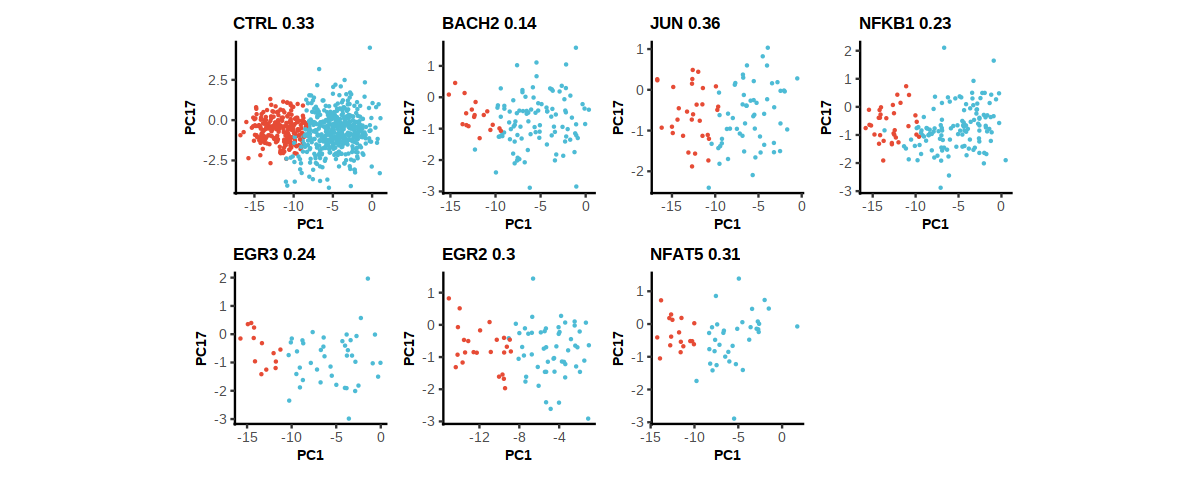

In [397]:
psize(10,4)
plot.pc.y.list%>%wrap_plots(ncol=4)
ggsave('results//pc_n3/pc_scatter_y.pdf',width = 10,height = 4)

Warning message:
“ggrepel: 28 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 28 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


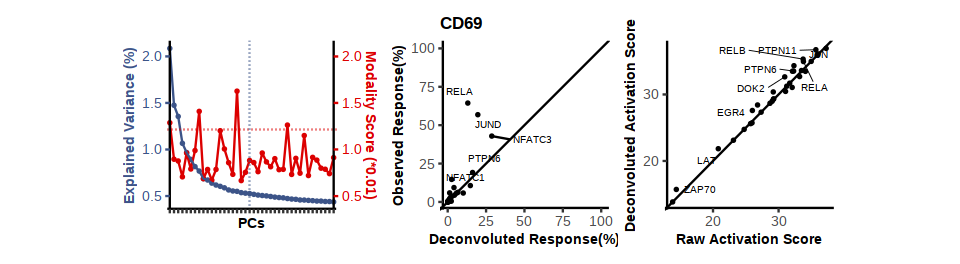

In [475]:
psize(8,2.2)
plot.percentage+
plot.rank+
(plot.cor+ggtitle(''))

ggsave('results/pc_n3/results.part1.pdf',width = 8,height = 2.2)

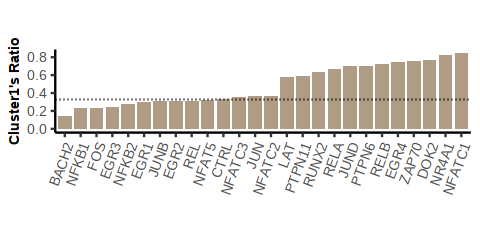

In [458]:
psize(4,2)
plot.ratio
ggsave('results/pc_n3/plot.ratio.pdf',height = 2, width = 4)

In [455]:
psize(4,4)
pdf('results/pc_n3/heatmap.EM.pdf',height = 4,width = 4)
plot.heatmap
dev.off()

Cairo 
    2

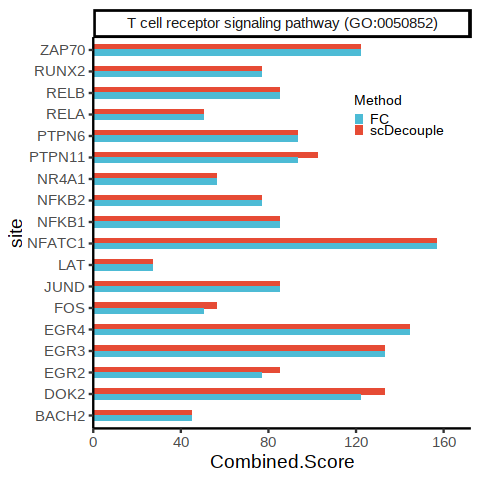

In [465]:
psize(4,4)
plot.enrichScore
ggsave('results//pc_n3/plot.enrich.pdf',height = 4,width = 4)